<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
<br />
Софья, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

## Телеком — задача проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL*,* от англ. *digital subscriber line*, «цифровая абонентская линия») или оптоволоконный кабель (*Fiber optic*).  

Также доступны такие услуги:

- Интернет-безопасность: антивирус (*DeviceProtection*) и блокировка небезопасных сайтов (*OnlineSecurity*);
- Выделенная линия технической поддержки (*TechSupport*);
- Облачное хранилище файлов для резервного копирования данных (*OnlineBackup*);
- Стриминговое телевидение (*StreamingTV*) и каталог фильмов (*StreamingMovies*).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

### Описание данных

Данные состоят из файлов, полученных из разных источников:

- `contract.csv` — информация о договоре;
- `personal.csv` — персональные данные клиента;
- `internet.csv` — информация об интернет-услугах;
- `phone.csv` — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.

Информация о договорах актуальна на 1 февраля 2020.

### Цель исследования
Необходимо провести исследовательский анализ исходных данных, на основе данных построить модель машинного обучения, которая будет прогнозировать отток клиентов компании.

### Ход исследования
1. Загрузка,изучение, предобработка исходных данных
2. Исследовательский анализ данных
3. Подготовка данных к построению моделей обучения
4. Построение моделей обучения (нескольких) для прогнозирования оттока клиентов
5. Проверка моделей обучения на тестовой выборке
6. Формирование общего вывода

## Загрузка и предобработка данных

Импортирую все необходимые библиотеки и модули, необходимые для реализации проекта.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%pip install catboost
from catboost import CatBoostClassifier
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import time

import warnings
warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Импортирую файлы csv для данного проекта. Так как файлов 4 штуки с различными данными, создаю 4 датафрейма для каждого файлы csv: data_contract, data_internet, data_personal, data_phone. В последующих шагах проекта объединю датафреймы в единый - по колонке customer_id. Использую конструкцию try-except для осущетсвления импорта в различных рабочих областях.

In [2]:
try:
    data_contract = pd.read_csv('C:/Users/msofia/Desktop/private/Yandex Practicum/Спринт 17 - Финальный проект/contract.csv')
except FileNotFoundError as e:
    print(e)
    data_contract = pd.read_csv('/datasets/final_provider/contract.csv')
    
data_contract.name = 'contract data'

[Errno 2] No such file or directory: 'C:/Users/msofia/Desktop/private/Yandex Practicum/Спринт 17 - Финальный проект/contract.csv'


In [3]:
try:
    data_internet = pd.read_csv('C:/Users/msofia/Desktop/private/Yandex Practicum/Спринт 17 - Финальный проект/internet.csv')
except FileNotFoundError as e:
    print(e)
    data_internet = pd.read_csv('/datasets/final_provider/internet.csv')
    
data_internet.name = 'internet data'

In [4]:
try:
    data_personal = pd.read_csv('C:/Users/msofia/Desktop/private/Yandex Practicum/Спринт 17 - Финальный проект/personal.csv')
except FileNotFoundError as e:
    print(e)
    data_personal = pd.read_csv('/datasets/final_provider/personal.csv')
    
data_personal.name = 'personal data'

In [5]:
try:
    data_phone = pd.read_csv('C:/Users/msofia/Desktop/private/Yandex Practicum/Спринт 17 - Финальный проект/phone.csv')
except FileNotFoundError as e:
    print(e)
    data_phone = pd.read_csv('/datasets/final_provider/phone.csv')
    
data_phone.name = 'phone data'

In [3]:
data_contract = pd.read_csv('/datasets/final_provider/contract.csv')
data_internet = pd.read_csv('/datasets/final_provider/internet.csv')
data_personal = pd.read_csv('/datasets/final_provider/personal.csv')
data_phone = pd.read_csv('/datasets/final_provider/phone.csv')

data_contract.name = 'contract data'
data_internet.name = 'internet data'
data_personal.name = 'personal data'
data_phone.name = 'phone data'

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Супер, данные на базе)

### Данные с заключенными контрактами

In [4]:
data_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


В таблице 8 колонок с данными:
- customerID - уникальный номер клиента
- BeginDate - дата заключения контракта
- EndDate - дата расторжения контракта
- Type - тип договора
- PaperlessBilling - есть ли бумажный чек
- PaymentMethod - метод оплаты контракта
- MonthlyCharges - месячная плата по контракту
- TotalCharges - итоговая плата по контракту

Наименования колонок не соответсвуют стилистически корректному написанию. Изменю наименования колонок на корректное стилистическое написание - строчными буквами. Пройдусь в цикле по каждому наименованию столбца и применю к наименованию метод lower(). В целях экономии времени, не буду приводить наименования колонок к snake_case.

In [5]:
columns_lower = []
for column in data_contract.columns:
    columns_lower.append(column.lower())

In [6]:
data_contract.columns = columns_lower

In [7]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


В таблице 7043 записей с данными, все данные заполнены, пропуски обрабатывать не нужно. Есть нарушения в типах данных (колонки totalcharges, begindate, enddate), исправлю далее методом astype().

In [8]:
data_contract['totalcharges'].value_counts()

20.2       11
           11
19.75       9
19.9        8
20.05       8
           ..
810.7       1
1119.35     1
6362.35     1
1441.8      1
296.15      1
Name: totalcharges, Length: 6531, dtype: int64

В уникальных значениях totalcharges наблюдаются пропуски в данных (пробел), заменю пробелы на 0 и посмотрю детальнее такие строчки.

In [9]:
data_contract['totalcharges'] = data_contract['totalcharges'].replace(" ", 0).astype('float64')

In [10]:
data_contract[data_contract['totalcharges']==0]

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,0.0
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,0.0
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,0.0
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,0.0
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,0.0
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,0.0
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,0.0
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,0.0
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,0.0
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,0.0


Все 11 строк, где totalcharges==0, содержат записи о контрактах, которые были заключены 01.02.2020г (в день выгрузки данных), поэтому оплата по контракту еще не производилась. Данные не повлияют на результат обучения, я их удалю.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>точно, новички)

In [11]:
data_contract = data_contract[data_contract['totalcharges']!=0]

In [12]:
data_contract['enddate'].value_counts()

No                     5163
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: enddate, dtype: int64

В колонке enddate (дата расторжения контракта) 4 уникальных значения, среди которых No - значит, что контракт все еще действителен. Для того, чтобы преобразовать колонку в корректный тип данных, я заменю No на дату выгрузки данных - 01.02.2020. А так же сделаю доп.колонку 'active' со значениями Yes (контракт действует) и No (контракт расторгнут).

In [13]:
data_contract['active'] = np.where(data_contract['enddate'] == 'No', 'Yes', 'No')

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>таак, можно сказать "целевая дома"))

In [14]:
data_contract['enddate'].replace("No", "2020-02-01 00:00:00", inplace=True)

In [15]:
data_contract['enddate'] = pd.to_datetime(data_contract['enddate'], format='%Y-%m-%d')

In [16]:
data_contract['begindate'] = pd.to_datetime(data_contract['begindate'], format='%Y-%m-%d')

Добавлю в датафрейм колонку duration со сроком продолжительности контракта в днях, вычитая begindate из enddate.

In [17]:
data_contract['duration'] = (data_contract['enddate']-data_contract['begindate']).dt.components['days']

In [18]:
data_contract.head()

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges,active,duration
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,Yes,31
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,Yes,1036
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,No,61
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,Yes,1371
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,No,61


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>да, это интересный фактор, ОК.

In [19]:
data_contract.duplicated().sum()

0

Дубликатов в данных нет.

### Данные с информацией об интернете

In [20]:
data_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


В таблице 8 колонок с данными:

- customerID - уникальный номер клиента
- InternetService - тип подключения интернета
- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies  - наличие услуг онлайн-безопасноти, онлайн-резервной копии, защиты девайса, тех.поддержки, телевидения, фильмов соответственно.

Так же стилистически преобразую наименования колонок.

In [21]:
columns_lower = []
for column in data_internet.columns:
    columns_lower.append(column.lower())

In [22]:
data_internet.columns = columns_lower

In [23]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


В датафрейме 5517 строк с данными, пропусков нет.

In [24]:
data_internet.duplicated().sum()

0

Дубликатов в данных нет.

### Данные о клиентах

In [25]:
data_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


В таблице 5 колонок с данными:

- customerID - уникальный номер клиента
- gender - пол
SeniorCitizen - является ли клиент пенсионером (1-да, 0-нет)
- Partner - есть ли у клиента супруг(-а)
- Dependents - есть у клиента на попечении иждивенцы

Так же стилистически преобразую наименования колонок.

In [26]:
columns_lower = []
for column in data_personal.columns:
    columns_lower.append(column.lower())

In [27]:
data_personal.columns = columns_lower

In [28]:
data_personal['seniorcitizen'] = data_personal['seniorcitizen'].replace(1,'Yes')
data_personal['seniorcitizen'] = data_personal['seniorcitizen'].replace(0,'No')

In [29]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   object
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


В датафрейме 7043 строк с данными, пропусков нет.

In [30]:
data_personal.duplicated().sum()

0

Дубликатов в данных нет.

### Данные с информацией о телефонных услугах

In [31]:
data_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


В таблице 5 колонок с данными:

- customerID - уникальный номер клиента
- MultipleLines - есть ли наличие подключения к нескольким линиям телефонии.

Так же стилистически преобразую наименования колонок.

In [32]:
columns_lower = []
for column in data_phone.columns:
    columns_lower.append(column.lower())

In [33]:
data_phone.columns = columns_lower

In [34]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


В датафрейме 6361 строк с данными, пропусков нет.

In [35]:
data_phone.duplicated().sum()

0

Дубликатов в данных нет.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>ОК. И на месте первичный аналитический осмотр. Процедура обыденная. Но позволяет сгенерировать много идей для моедлирования

### Создание единого датафрейма

Во всех исходных таблицах есть одно объединяющее поле - customerid - уникальный номер клиента. По этому полю можно соединить все датафрйемы в единый.

In [36]:
data = data_contract.merge(data_internet, on = 'customerid', how = 'left')
data = data.merge(data_personal, on = 'customerid', how = 'left')
data = data.merge(data_phone, on = 'customerid', how = 'left')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   active            7032 non-null   object        
 9   duration          7032 non-null   int64         
 10  internetservice   5512 non-null   object        
 11  onlinesecurity    5512 non-null   object        
 12  onlinebackup      5512 non-null   object        
 13  deviceprotection  5512 non-null   object        
 14  techsupport       5512 n

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>есть контакт)

В некоторых полях появились пропуски из-за отсутствия подключения каких-либо услуг у клиента. Заполню пропуски.

In [38]:
data['multiplelines'] = data['multiplelines'].fillna('No phone')

In [39]:
data = data.fillna('No internet')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7032 non-null   object        
 1   begindate         7032 non-null   datetime64[ns]
 2   enddate           7032 non-null   datetime64[ns]
 3   type              7032 non-null   object        
 4   paperlessbilling  7032 non-null   object        
 5   paymentmethod     7032 non-null   object        
 6   monthlycharges    7032 non-null   float64       
 7   totalcharges      7032 non-null   float64       
 8   active            7032 non-null   object        
 9   duration          7032 non-null   int64         
 10  internetservice   7032 non-null   object        
 11  onlinesecurity    7032 non-null   object        
 12  onlinebackup      7032 non-null   object        
 13  deviceprotection  7032 non-null   object        
 14  techsupport       7032 n

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>согласен с заменой.

In [41]:
data.duplicated().sum()

0

Повторная проверка на дубликаты - явных дубликатов нет.

## Исследовательский анализ данных

### Доля ушедших клиентов

Построю график с долей ушедших клиентов (расторженных договоров) и долей клиентов, которые все еще пользуются услугами компании. 

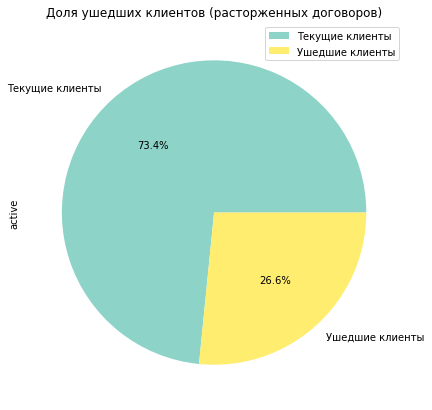

In [42]:
labels=['Текущие клиенты','Ушедшие клиенты']
data['active'].value_counts().plot(kind='pie',
                                    figsize=(9,7),
                                    colormap='Set3',
                                    use_index=True,
                                    title="Доля ушедших клиентов (расторженных договоров)",
                                    labels=labels,
                                    autopct='%1.1f%%')
plt.legend()


Почти одна треть клиентов расторгли договоры услуг телеком компании. Исследую детальнее разрезы данных групп клиентов.

### Доля ушедших клиентов в разрезе пола

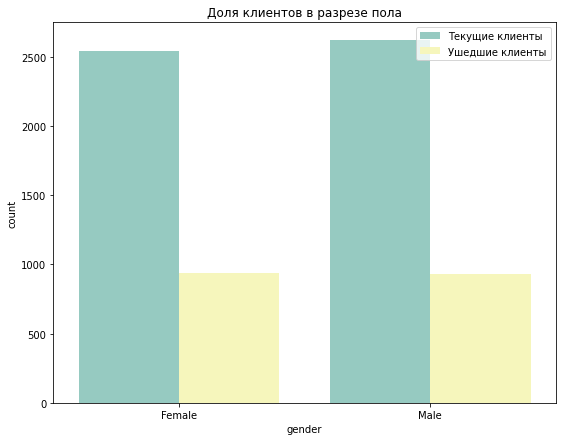

In [43]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x='gender', data=data, hue='active', palette='Set3')
plt.title('Доля клиентов в разрезе пола')
plt.legend(['Текущие клиенты','Ушедшие клиенты'])

Пол никак не влияет на расторжение контракта с компанией, одинаково прекращают услуги мужчины и женщины.

### Доля ушедших клиентов в разрезе типа оплаты

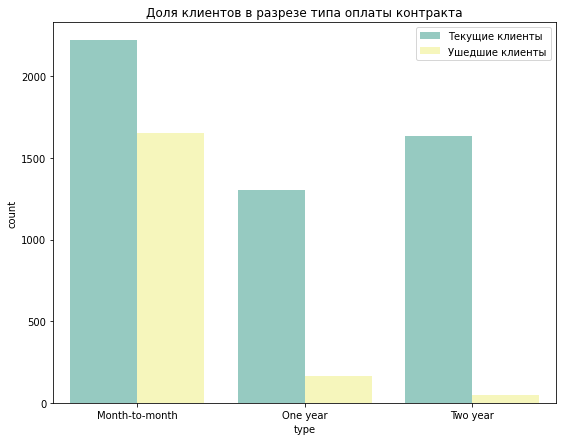

In [44]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x='type', data=data, hue='active', palette='Set3')
plt.title('Доля клиентов в разрезе типа оплаты контракта')
plt.legend(['Текущие клиенты','Ушедшие клиенты'])

Клиенты, которые заключили контракт с помесячным типом оплаты услуг гораздо чаще расторгают контракт, чем остальные клиенты, несмотря на то, что помесячный тип оплаты самый популярный среди типов. 
Рассмотрю детальнее какие платежи совершали клиенты, которые расторгли договор с компанией. Возможно, размер платежа повлиял на их уход.

### Распределение ежемесячного платежа

In [45]:
data_outflow = data[data['active']=='No']

In [46]:
data_active = data[data['active']=='Yes']

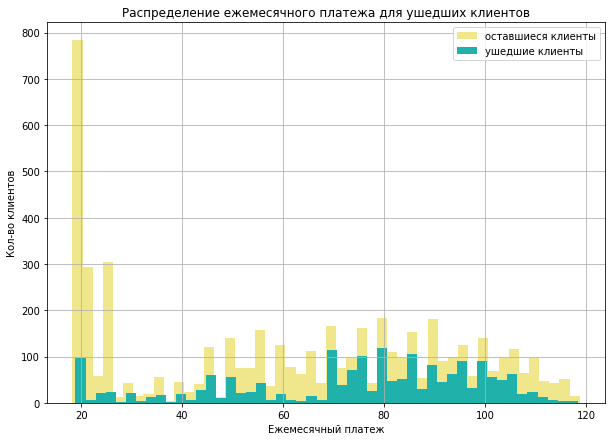

In [47]:
data_active['monthlycharges'].hist(bins=50, color='khaki', figsize=(10,7))
plt.title('Распределение ежемесячного платежа для клиентов')
plt.xlabel('Ежемесячный платеж')
plt.ylabel('Кол-во клиентов')
data_outflow['monthlycharges'].hist(bins=50, color='lightseagreen', figsize=(10,7))
plt.title('Распределение ежемесячного платежа для ушедших клиентов')
plt.xlabel('Ежемесячный платеж')
plt.ylabel('Кол-во клиентов')
plt.legend(['оставшиеся клиенты','ушедшие клиенты'])

На гистограмме выше видно, что у сотавшихся клиентов большинство платежей около 20 (у.е) в месяц, так же преобладают платежи около 30 (у.е) в месяц. У клиентов, которые ушли нет такого пика, большинство клиентов платят сумму в месяц от 70 до 110 (у.е).

### Доля ушедших клиентов в разрезе способа оплаты

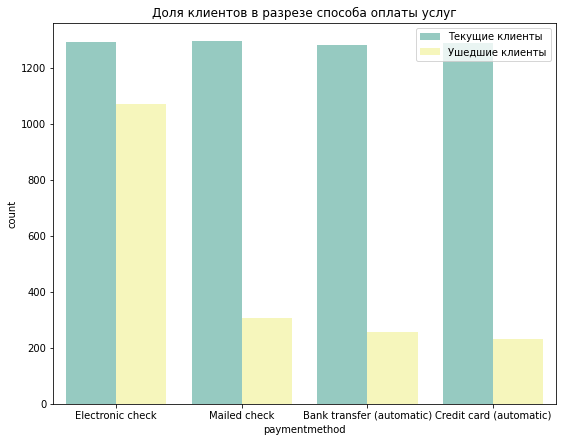

In [48]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x='paymentmethod', data=data, hue='active', palette='Set3')
plt.title('Доля клиентов в разрезе способа оплаты услуг')
plt.legend(['Текущие клиенты','Ушедшие клиенты'])

Большее количество клиентов, которые расторгли контракт использовали электронные чеки в качестве способа оплаты услуг.

### Доля ушедших клиентов в разрезе способа оплаты

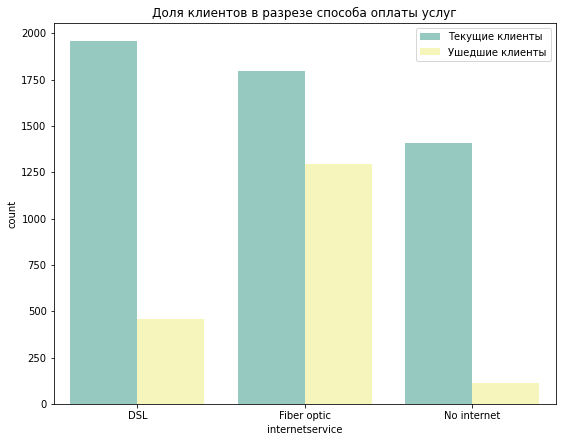

In [49]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x='internetservice', data=data, hue='active', palette='Set3')
plt.title('Доля клиентов в разрезе способа оплаты услуг')
plt.legend(['Текущие клиенты','Ушедшие клиенты'])

Подавляющее количество клиентов, прекративших пользование услугами компании подключали интернет с помощью волоконно-оптического канала. Тип подключения DSL оказался самым популярным среди клиентов, которые продолжают пользоваться услугами компании.

## Вывод на основе анализа данных

В исходных данных пердставлена информация, выгруженная 1 февраля 2020 года о клиентах телеком-компании, об их подключенных услугах, о типах/способах оплаты контракта. Используя данные о дате старта и даты окончания контракта, получилось выделить группу ушедших клиентов для дальнейшего исследовательского анализа. При слиянии 4 таблиц с данными (персональные данные, интернет, телефония, инфо о контракте) в некоторых ячейках получились пропуски, что означает, что некоторые клиенты не пользовались частью услуг (например не подключали мульти-линию телефонии).

Для исселдовательского анализа данных я визуализировала долю ушедших клиентов в различных разрезах и при необходимости углублялась в детали, получилось сделать следующие выводы:
- Расторгнутые договоры составляют примерно треть от всех договоров
- Отток клиентов не зависит от пола, количество оставшихся и ушедших клиентов делится примерно поровну на мужчин и женщин
- Большинство ушедших клиентов использовали оплату month-to-month (ежемесячная оплата услуг)
- Анализ суммы платежей month-to-month показал, что большинство текущих клиентов компании имеют тариф около 20 у.е. в месяц, однако у ушедших клиентов пика в этой зоне замечено не было, их платежи в основном приходятся на 70-110 у.е. в месяц, что может говорить о том, что клиенты ушли из-за высоких тарифов
- Большинство ушедших клиентов использовали в качестве оплаты электронный чек, хотя среди текущих клиентов способы оплаты распределены равномерно, возможно сущетсвуют какие-либо проблемы с этим способом оплаты, необходимо привлекать команду фин.теха для установки причины неполадок
- Несмотря на то, что самый популярный тип соединения интернета у текущих клиентов DSL, большинство ушедших клиентов использовали волоконную оптику, возможно данный тип соединения не позволял использовать интернет на полную мощность

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
СУПЕР!!!!!! Напомню только, чтографический анализ - это предположение/гипотеза. И чтобы её подтвердить или опровергнуть также следует применять аналитические методы анализа из области "проверка гипотез".

## Дальнейший план действий

1. Подготовить данные к обучению
- выделить целевой и остальные признаки
- применить кодирование при необходимости
- исследовать признаки на мультиколлинеарность
- разделить данные на обучаемую и тестовую выборки
- применить масштабирование при необходимости
2. Обучить модели
- Подобрать гиперпараметры к различным моделям для лучшего результата метрики
3. Тестирование модели
- Обучени модели на признаках из обучаемой выборки и применение модели на признаки из тестовой выборки 
- Построение графика метрики auc roc
4. Формирование итогового вывода

## Обучение моделей
### Подготовка данных

Разобью данные на признаки и целевой признак. Целевой признак - active, но его необходимо привести к бинарной классификации, поэтому создам столбец outflow, где 1 - клиент ушел, 0 - клиент остался.

In [50]:
data['outflow'] = np.where(data['active'] == 'No', 1, 0)

In [51]:
data['outflow'].value_counts()

0    5163
1    1869
Name: outflow, dtype: int64

Таким образом, целевой признак - outflow. А признаки - все остальные колонки, за исключением следующих 'active','outflow','customerid','enddate','begindate'. Уникальный номер клиента не повлияет на результат, а даты старта и окончания контракта могут переобучить модель из-за утечки данных, так что модель будет основываться только на признаках персональный данных, а так же наличия/отсутствия подключенных услуг.

In [52]:
target = data['outflow']

In [53]:
features = data.drop(['active','outflow','customerid','enddate','begindate'], axis=1)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОТЛИЧНО, что удаляешь факторы-даты!!!!! Если у нас тема НЕ временные ряды, то такие факторы лучше не использовать. Они "нагонят" метрики, но бизнес-эффективность модели  - рухнет.

Для прямого кодирования признаков использую метод прямого кодирования get_dummies на все признаки.

In [54]:
features_dummies = pd.get_dummies(features, drop_first=True)

In [55]:
features_dummies.head()

,monthlycharges,totalcharges,duration,type_One year,type_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,internetservice_Fiber optic,...,streamingtv_No internet,streamingtv_Yes,streamingmovies_No internet,streamingmovies_Yes,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,multiplelines_No phone,multiplelines_Yes
0,29.85,29.85,31,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,56.95,1889.50,1036,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,53.85,108.15,61,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,42.30,1840.75,1371,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,70.70,151.65,61,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, принято.

Для того, чтобы исследовать данные на мультиколлинеарность, выведу матрицу корреляции импортированным методом phik между всеми столбцами features_dummies. Мультиколлинеарность — корреляция независимых переменных, которая затрудняет оценку и анализ общего результата. В машинном обучении мультиколлинеарность может стать причиной переобучаемости модели, что приведет к неверному результату.

interval columns not set, guessing: ['monthlycharges', 'totalcharges', 'duration', 'type_One year', 'type_Two year', 'paperlessbilling_Yes', 'paymentmethod_Credit card (automatic)', 'paymentmethod_Electronic check', 'paymentmethod_Mailed check', 'internetservice_Fiber optic', 'internetservice_No internet', 'onlinesecurity_No internet', 'onlinesecurity_Yes', 'onlinebackup_No internet', 'onlinebackup_Yes', 'deviceprotection_No internet', 'deviceprotection_Yes', 'techsupport_No internet', 'techsupport_Yes', 'streamingtv_No internet', 'streamingtv_Yes', 'streamingmovies_No internet', 'streamingmovies_Yes', 'gender_Male', 'seniorcitizen_Yes', 'partner_Yes', 'dependents_Yes', 'multiplelines_No phone', 'multiplelines_Yes']


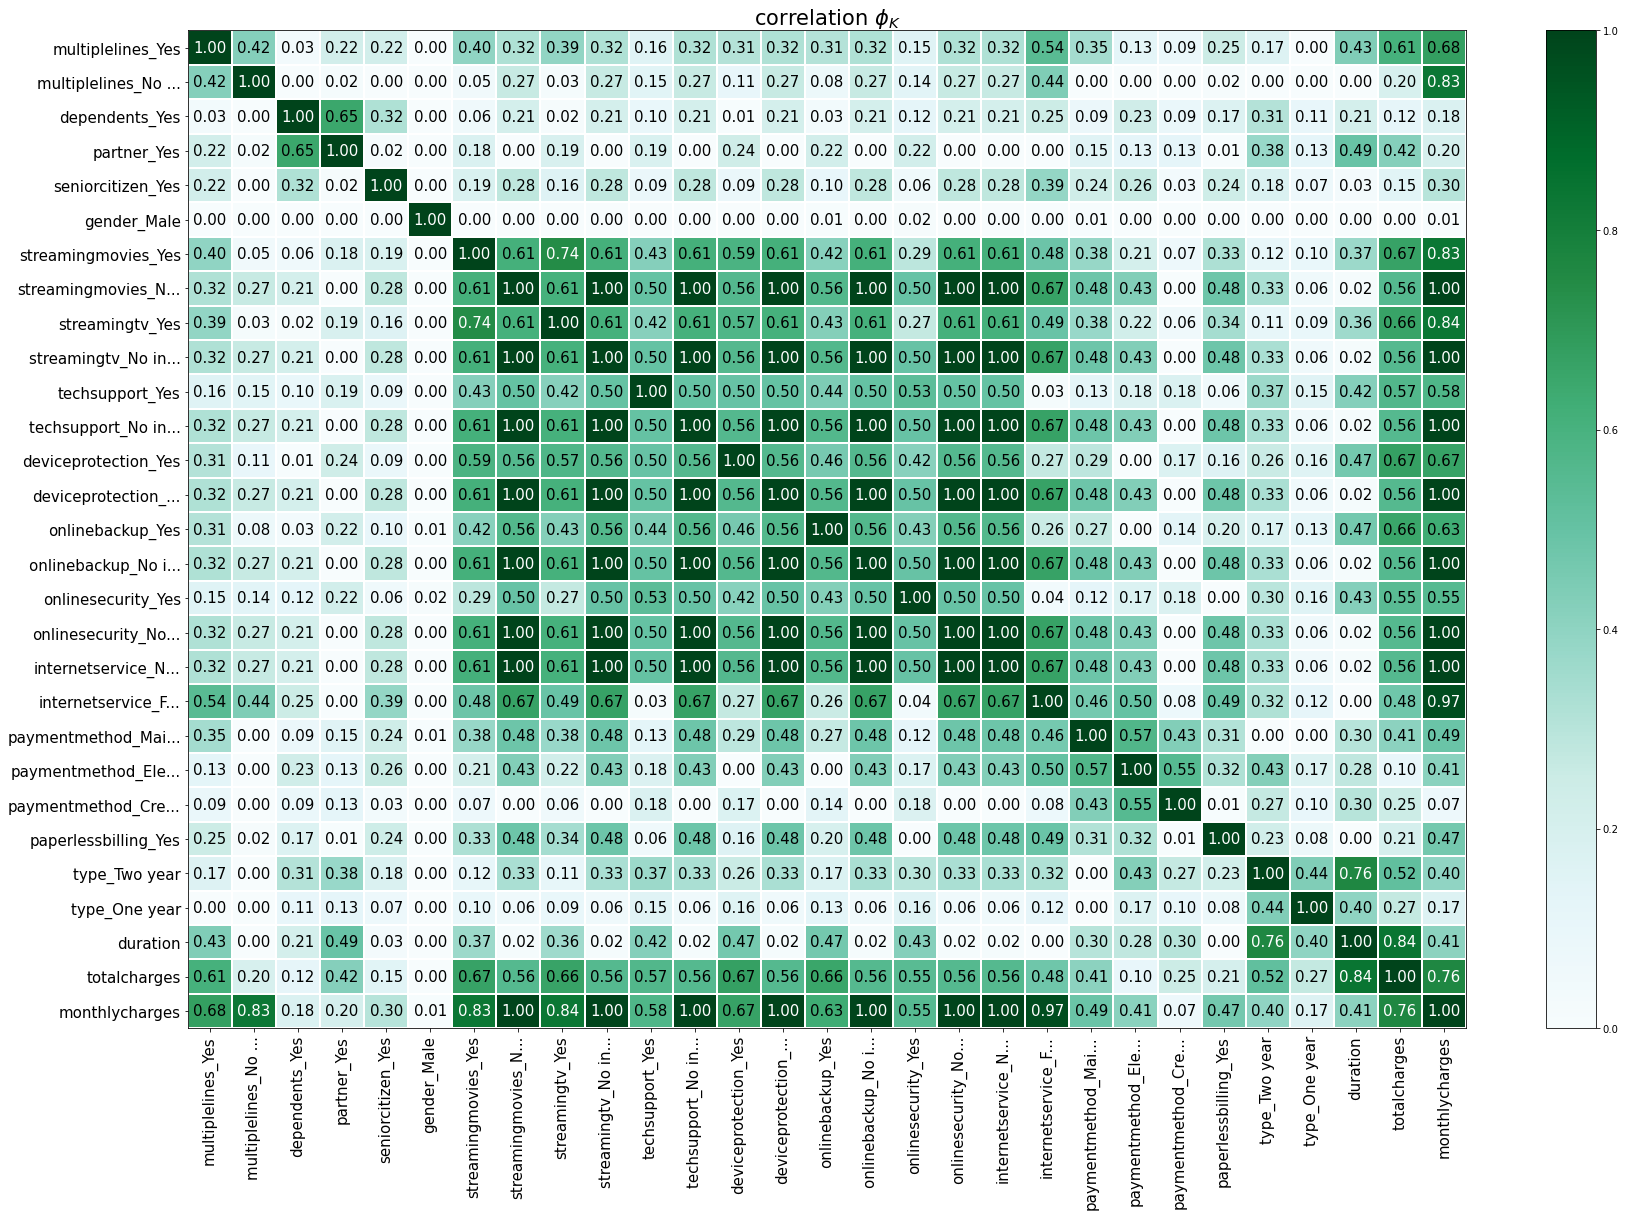

In [58]:
phik_overview = features_dummies.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="BuGn", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(25, 17))
plt.tight_layout()

Phik матрица корреляции показала, что наличие/отсутствие некоторых сервисов и услуг коррелирует с ежемесячными патежами и итоговыми платежами, что является нормой. А так же корреляция наблюдается между наличием или отсутствием различных сервисов, что тоже является нормой, так как некоторые инетрнет сервисы покупаются пакетами. Поэтому мной решено не исключать ни один признак при обучении моделей. И видно, что totalcharges коррелирует с duration, что нормально, ведь с увеличением срока действия контракта, итоговая сумма оплаты так же увеличивается.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
аргументацию понял.  ОК

Разделю данные на обучающую и тестовую выборки.

In [57]:
features_train_d, features_test_d, target_train_d, target_test_d = train_test_split(features_dummies, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=12345)

In [58]:
features_train_d.shape

(5274, 29)

In [59]:
features_test_d.shape

(1758, 29)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>трайн и тест, с проверкой. ОК.

Масштабирую количественные признаки (их три : 'monthlycharges', 'totalcharges', 'duration') методом StandardScaler(). Масштабирование происходит после разбиения на выборки во избежание утечки данных и переобучения.

In [60]:
numeric = ['monthlycharges', 'totalcharges', 'duration']

scaler = StandardScaler()
scaler.fit(features_train_d[numeric])

features_train_d[numeric] = scaler.transform(features_train_d[numeric])
features_test_d[numeric] = scaler.transform(features_test_d[numeric])

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>верно, масштабирование раздельное.

In [61]:
features_train_d.head()

,monthlycharges,totalcharges,duration,type_One year,type_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,internetservice_Fiber optic,...,streamingtv_No internet,streamingtv_Yes,streamingmovies_No internet,streamingmovies_Yes,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,multiplelines_No phone,multiplelines_Yes
5486,0.296184,-0.604484,-0.878490,0,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2004,0.475876,1.507270,1.521473,0,1,1,0,0,0,0,...,0,1,0,0,1,0,1,1,0,1
1795,-0.702104,-0.992243,-1.284493,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5621,1.281161,0.743794,0.259389,0,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1
6286,-1.489087,-0.560101,0.625327,0,1,0,0,0,0,0,...,1,0,1,0,0,0,1,1,0,0


### Логистическая регрессия

Метрика для оценки результата - ROC AUC. с помощью подбора параметров GridSearchCV ищу наилучший резлуьтат метрики.

In [65]:
model = LogisticRegression(random_state=12345)
parameters = {'penalty':['l1','l2'], 
             'C':[0.1, 1, 10, 100],
             'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search = GridSearchCV(estimator=model, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='roc_auc', 
                      verbose=1, 
                      n_jobs=-1)
result = search.fit(features_train_d, target_train_d)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 15 folds for each of 40 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 572 tasks      | elapsed:   10.8s


Best Score: 0.842646345033273
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   11.4s finished


Метрика с наилучшими подобранными гиперпараметрами получилась 0.84. 

### Дерево решений

In [66]:
model = DecisionTreeClassifier(random_state=12345)
parameters = {'criterion':['gini', 'entropy'], 
             'max_depth':[2,4,6,8,10,12]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search = GridSearchCV(estimator=model, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='roc_auc', 
                      verbose=1, 
                      n_jobs=-1)
result = search.fit(features_train_d, target_train_d)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 12 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Best Score: 0.8417446677237291
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 6}


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.8s finished


Метрика с наилучшими подобранными гиперпараметрами получилась 0.84. 

### Случайный лес

In [67]:
model = RandomForestClassifier(random_state=12345)
parameters = {'max_depth':[6,8,10,12],
              'n_estimators':[30,50,100],
              'min_samples_split': [20,30],
              'min_samples_leaf':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
search = GridSearchCV(estimator=model, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='roc_auc', 
                      verbose=1, 
                      n_jobs=-1)
result = search.fit(features_train_d, target_train_d)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 48 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:   45.8s finished


Best Score: 0.8567563708380352
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 100}


Метрика с наилучшими подобранными гиперпараметрами получилась 0.86 c параметрами 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 100.

Из трех моделей лучший результат показала модель Случайного Леса. Попробую исследовать баланс классов целевого признака.

0    0.734215
1    0.265785
Name: outflow, dtype: float64


<AxesSubplot:title={'center':'Баланс классов целевого признака'}>

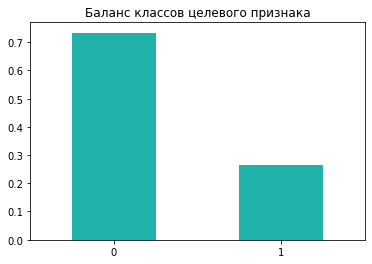

In [68]:
class_frequency=data['outflow'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar', color='lightseagreen', title='Баланс классов целевого признака', rot=1)

Классы несбалансированны, когда их соотношение далеко от 1:1. Баланс классов наблюдается, если их количество примерно равно. В нашей задаче наблюдается сильный дисбаланс классов, что плохо сказывается на обучении модели. Если поработать с балансом классов, получится увеличить значение метрики до необходимой. Попробую две механики - upsampling и downsampling.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>Да, разбаланс виден. Чаще всего границу принимают на уровне 0.25-0.30 , всё, что ниже - однозначно в балансировку). А так - на усмотрение аналит

#### Upsampling

In [69]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train_d, target_train_d, 10)

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>А если масштабируем, то только трайн, ОК.

In [70]:
model = RandomForestClassifier(random_state=12345, 
                               max_depth=10, 
                               min_samples_leaf=30, 
                               min_samples_split=100)
model.fit(features_upsampled, target_upsampled)
probabilities = model.predict_proba(features_upsampled)
probabilities_one = probabilities[:, 1]
auc_roc = roc_auc_score(target_upsampled, probabilities_one)
print('Best Score: %s' % auc_roc)

Best Score: 0.89638749015364


#### Downsampling

In [71]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train_d, target_train_d, 0.1)

In [72]:
model = RandomForestClassifier(random_state=12345, 
                               max_depth=10, 
                               min_samples_leaf=30, 
                               min_samples_split=100)
model.fit(features_downsampled, target_downsampled)
probabilities = model.predict_proba(features_downsampled)
probabilities_one = probabilities[:, 1]
auc_roc = roc_auc_score(target_downsampled, probabilities_one)
print('Best Score: %s' % auc_roc)

Best Score: 0.8616807276368


При применении механики upsampling метрика значительно увеличилась почти до 0.90.

### CatBoost

Воспользуюсь обучением еще одной модели классификации - CatBoostClassifier. Для этого воспроизведу еще раз код разбиения на выборки, для этой модели не нужны кодирования и масштабирования признаков.

In [73]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=12345)

In [74]:
features_train.columns

Index(['type', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'duration', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'multiplelines'],
      dtype='object')

Все категориальные признаки необходимо выделить в отдельный список.

In [75]:
cat_features = ['type', 'paperlessbilling', 'paymentmethod', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'multiplelines']

Для модели подбираю лучшие гиперпараметры, используя GridSearchCV.

In [ ]:
'''model_cat = CatBoostClassifier(cat_features=cat_features, 
                               loss_function='Logloss',
                               eval_metric='AUC')
parameters = {'learning_rate': [0.1, 0.5],
              'iterations': [1000],
              'depth': [5,7,9]}

search = GridSearchCV(estimator=model_cat, 
                      param_grid=parameters,
                      cv=5, 
                      scoring='roc_auc',
                      n_jobs=1,
                      verbose=50)
result = search.fit(features_train, target_train)
print('Best Score для модели catboost: %s' % result.best_score_)
print('Best Hyperparameters catboost: %s' % result.best_params_)'''

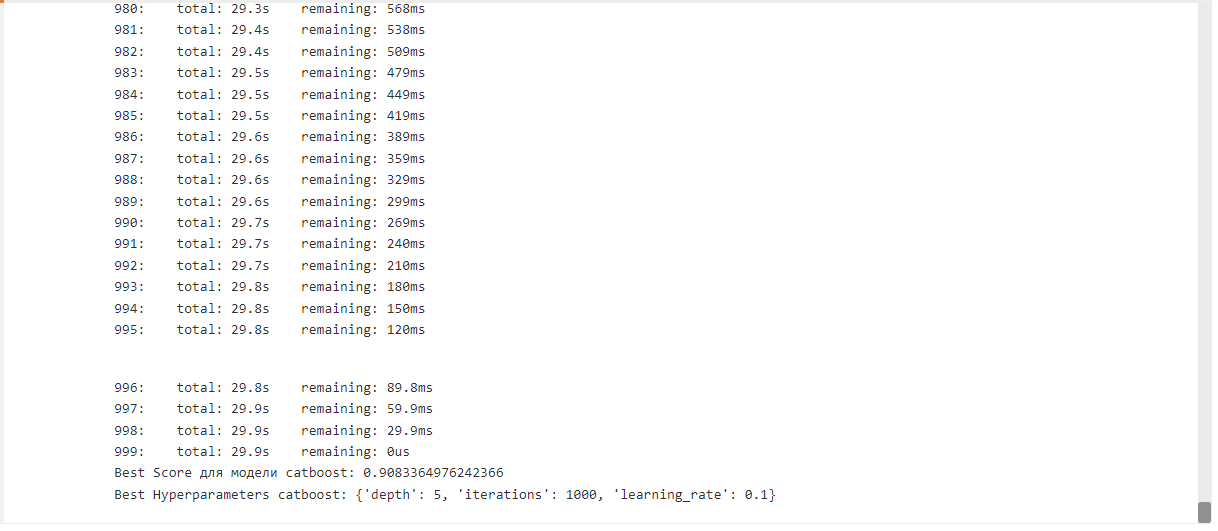

Модель закомментирована в целях несовершения пересчета параметров при последующем обновлении. Лучшая метрика получилась 0.91 с гиперпараметрами depth=5, iterations=1000, learning_rate=0.1.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>спасибо, это экономит время!

Для тестирования выберу модель catboostclassifier.

 ### Тестирование модели

Пропишу функцию, которая рассчитывает метрику AUC ROC для тестовой выборки, а так же считает время обучения модели и скорость предсказаний.

In [76]:
def time_rmse (model, features_train, target_train, features_test, target_test):
    start = time.time()
    model.fit(features_train, target_train)
    end = time.time()
    time_to_fit = end - start
    
    start = time.time()
    probabilities = model.predict_proba(features_test)
    end = time.time()
    time_to_predict = end - start
    probabilities = model.predict_proba(features_test)
    probabilities_one = probabilities[:, 1]
    auc_roc = roc_auc_score(target_test, probabilities_one)
    
    return print(f'Метрика качества (auc_roc) модели: {auc_roc}; Время обучения модели: {time_to_fit}; Скорость предсказания: {time_to_predict}')

#### Случайный лес

In [77]:
model = RandomForestClassifier(random_state=12345, 
                               max_depth=10, 
                               min_samples_leaf=30, 
                               min_samples_split=100)
time_rmse(model, features_train_d, target_train_d, features_test_d, target_test_d)

Метрика качества (auc_roc) модели: 0.8621219303279029; Время обучения модели: 0.3552820682525635; Скорость предсказания: 0.023542165756225586


#### CatBoost

In [78]:
model = CatBoostClassifier(cat_features = cat_features, 
                          loss_function="Logloss",
                          eval_metric='AUC',
                          depth=5, 
                          iterations=1000, 
                          learning_rate=0.1,
                          verbose=False)
time_rmse(model, features_train, target_train, features_test, target_test)

Метрика качества (auc_roc) модели: 0.9227677569044233; Время обучения модели: 45.36922335624695; Скорость предсказания: 0.02405714988708496


Метрика качества AUC ROC оказалась выше у модели CatBoostClassifier, однако время обучения модели быстрее в несколько раз у модели Случайного леса. Так как высокая метрика качсетва превалирует над скоростью обучения модели, я бы предпочла выбрать модель CatBoostClassifier для внедрения в продакшн.

Визуализирую важность признаков при обучении модели CatBoostClassifier.

In [79]:
features_test.columns

Index(['type', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'duration', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'multiplelines'],
      dtype='object')

In [80]:
features_names=['type', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'duration', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'multiplelines']

<AxesSubplot:title={'center':'Feature importances'}>

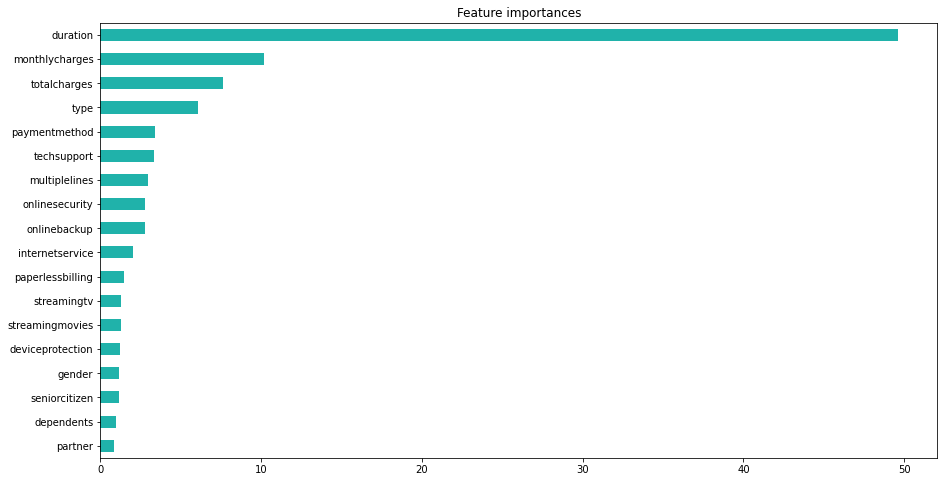

In [81]:
importances =  model.feature_importances_
cat_importances = pd.Series(importances, index=features_names)
cat_importances_sort = cat_importances.sort_values()

cat_importances_sort.plot.barh(color='lightseagreen', title='Feature importances', figsize=(15,8))

Больше всего на модель влияют такие признаки как duration (самый влиятельный признак, значительно выделяющийся среди других), monthlycharges, totalcharges. Меньше влияет type.

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта")

### График AUC-ROC

Чтобы выявить, как сильно наша модель отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC.  AUC-ROC случайной модели равна 0.5. Метрика должна быть больше 0.5.

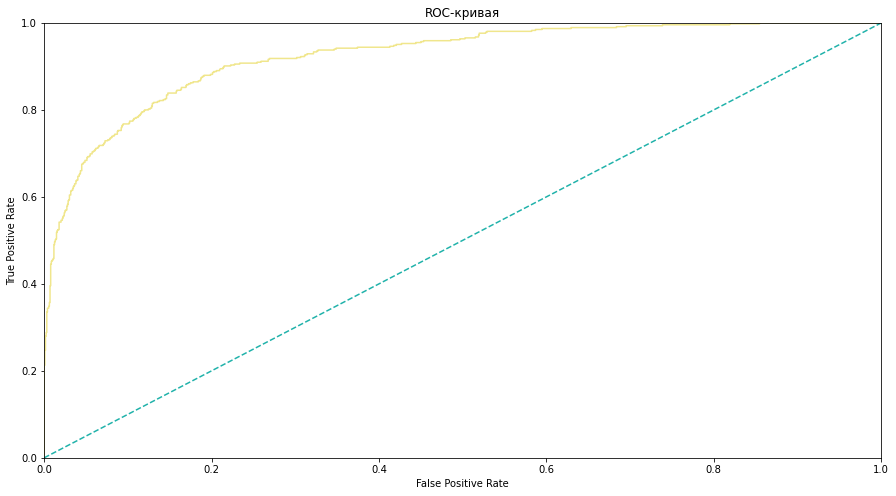

In [82]:
model = CatBoostClassifier(cat_features = cat_features, 
                          loss_function="Logloss",
                          eval_metric='AUC',
                          depth=5, 
                          iterations=1000, 
                          learning_rate=0.1,
                          verbose=False)
model.fit(features_train,target_train) 
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test,probabilities_one_test)

plt.figure(figsize=(15,8))
plt.plot(fpr, tpr, color='khaki')
plt.plot([0, 1], [0, 1], linestyle='--', color='lightseagreen')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.figure
plt.show()

In [83]:
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC score равен:', auc_roc)
if auc_roc>0.5:
    print('Метрика AUC-ROC больше 0.5, модель отличается от случайной, у модели высокое качество')
else:
    print('Метрика AUC-ROC не больше 0.5, модель низкого качества, не лучше случайной модели')

AUC-ROC score равен: 0.9227677569044233
Метрика AUC-ROC больше 0.5, модель отличается от случайной, у модели высокое качество


<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></p>
ОК, Софья, скажу, что уверенная и качественная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная интересная модельная работа!!!!, конечные результаты, графика - многое удалось как надо. Можно сказать, что пройден весь алгоритм моделирования от анализа исходной инфо до анализа важности факторов.<br> 
А что совсем хорошо, так это то, что не стал гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки - всегда есть соблазн их оставить...)<br>

Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования (что-то ты и так хорошо используешь):<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- Оцениваем мультиколлинеарность.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.<br><br><br>

В общем-то, вопросов у меня и нет особых.<br>
Возможно, что у тебя остались/появились свои?

<div class="alert alert" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ студента</b></u></p>
    Спасибо за ревью!

<div class="alert alert-success" style="border-color: green; border-radius: 5px">
    <p><u><b>✅ КОММЕНТАРИЙ РЕВЬЮЕРА 2</b></u></p>
Привет, Софья!<br>
Спасибо за отклик!, за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>

## Вывод на основе обучения моделей

Так как модель должна решать задачу классификации, были выбраны следующие модели для обучения:
- DecisionTreeClassifier (показала лучший результат метрики на обучаемой выборке AUC 0.84)
- LogisticRegression (лучший результат 0.84)
- RandomForestRegressor (лучший результат 0.86)
- CatBoostClassifier (лучший результат 0.91)

Для увеличения метрики качества для модели RandomForestRegressor была выполнена борьба с дисбалансом классов механикой upsampling, благодаря чему метрика качества достигла значения 0.90.

Для тестирования модели на тестовой выборке были отобраны две лучшие модели - **Случайный Лес и CatBoostClassifier**.
- Случайный лес показал результат метрики качества 0.86, скорость обучения 0.29, скорость предсказания 0.02.
- CatBoostClassifier показал результат метрики качества **0.92**, скорость обучения 31.62, скорость предсказания 0.01.
Несмотря на высокую скорость обучения у Случайного Леса, метрика AUC ROC у модели CatBoostClassifier гораздо выше, поэтому рекомендую исползовать именно ее в продакшн.

Визуализация важности признаков при обучении у модели CatBoostClassifier показала, что самые важные признаки - длительность действия контракта (важность признака значительно выше остальных), ежемесячные выплаты, итоговые суммарные выплаты по контракту.

Визуализация кривой AUC ROC показала, что Метрика AUC-ROC больше 0.5, модель отличается от случайной, у модели высокое качество.


## Отчёт


- Какие пункты плана были выполнены, а какие — нет (поясните почему)?

Все пункты плана были выполнены. Подготовка данных к обучению произведена успешно, масштабирование было применено к количественным признакам. Так же для модели случайного леса была решена проблема дисбалансов классов целевого признака механикой upsampling, благодаря данной механики метрика качсетва была повышена.
- Какие трудности возникли и как вы их преодолели?

Для того, чтобы превысить порог наивысшего требуемого значения метрики качества, необходимо было среди моделей логистической регрессии, дерева решений и случайного леса прибегнуть так же к модели CatBoostClassifier, подборка гиперпараметров к которой может занимать длительное время. Однако при переборке данных мной параметров, метрика качества значительно первысила наивысшую требуемую. В общем, особо трудностей не возникло.
- Какие ключевые шаги в решении задачи выделили?

Ключевой шаг и основа к обучению моделей - это правильная подготовка признаков, их корректное кодирование, масштабирование, удаление признаков, которые слишком сильно коррелируют друг с другом, чтобы не допустить утечку данных. Следующий ключевой шаг - это подборка гиперпараметров, ведь если не перебрать несколько параметров, то будет сложно получить лучшую метрику качества.
- Какая ваша итоговая модель и какое у неё качество?

Моя итоговая выбранная модель - это CatBoostClassifier с гиперпараметрами depth=5, iterations=1000, learning_rate=0.1. Метрика AUC ROC для модели с данными гиперпараметрами получилась 0.92 для тестовой выборки.

<div class='alert alert-success'> 👍
Спасибо за отчет, проект принят!